modelo: 40
ano: 40
quilometragem: 40
idade_motorista: 40
tempo_carteira: 40
historico_acidentes: 40
valor_seguro: 40
Tabela de Dados do Seguro de Carros:
      modelo   ano  quilometragem  idade_motorista  tempo_carteira  \
0      Fusca  1990         150000               60              40   
1      Civic  2015          60000               30              12   
2      Civic  2016          50000               28              10   
3    Corolla  2018          30000               40              18   
4      Fusca  1992         140000               65              45   
5        Gol  2017          45000               35              15   
6       Onix  2018          30000               27               6   
7     Fiesta  2020          25000               32              10   
8      Palio  2017          28000               55              25   
9    Sandero  2021          15000               40              18   
10      Kwid  2020          23000               21               4   
11    

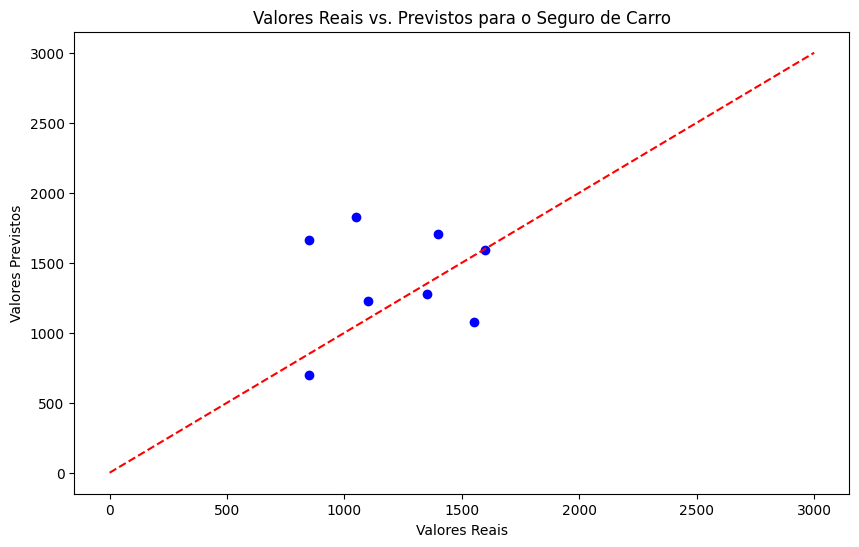


Tabela de Comparação entre Valores Reais e Previstos:
    Valor Real  Valor Previsto
19        1100     1225.713665
16         850     1663.363679
15        1050     1827.933248
26        1400     1708.377933
4          850      695.809254
12        1600     1589.798261
37        1350     1276.633528
27        1550     1078.460179


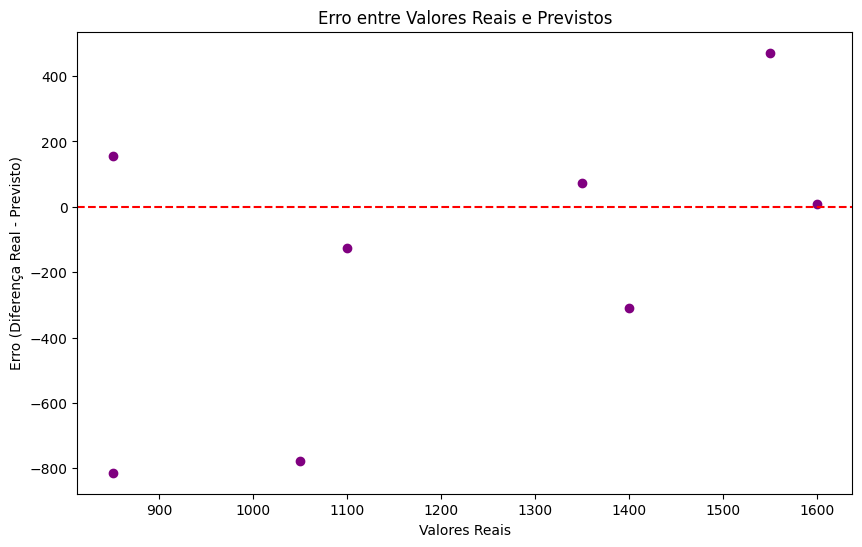

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Dados corrigidos com o mesmo número de entradas
data = {
    'modelo': ['Fusca', 'Civic', 'Civic', 'Corolla', 'Fusca', 'Gol', 'Onix', 'Fiesta', 'Palio', 'Sandero',
               'Kwid', 'Hilux', 'Tucson', 'X1', 'Focus', 'Civic', 'Kombi', 'Fiesta', 'Mobi', 'S10',
               'Argo', 'Toro', 'Tracker', 'Renegade', 'Compass', 'Strada', 'HR-V', 'City', 'HB20', 'Fusion',
               'Santa Fe', 'Jetta', 'Kicks', 'CR-V', 'Civic', 'Ecosport', 'Fusion', 'Fiesta', 'Jetta', 'Ka'],
    'ano': [1990, 2015, 2016, 2018, 1992, 2017, 2018, 2020, 2017, 2021, 2020, 2022, 2019, 2021, 2020, 2014, 1998, 2017, 2021, 2019,
            2018, 2019, 2020, 2021, 2021, 2020, 2022, 2018, 2019, 2020, 2020, 2018, 2021, 2020, 2017, 2022, 2020, 2018, 2019, 2020],
    'quilometragem': [150000, 60000, 50000, 30000, 140000, 45000, 30000, 25000, 28000, 15000, 23000, 50000, 40000, 35000, 22000, 80000, 170000, 30000, 10000, 20000,
                      45000, 47000, 32000, 31000, 28000, 29000, 35000, 23000, 26000, 30000, 32000, 28000, 25000, 33000, 31000, 29000, 20000, 35000, 31000, 27000],
    'idade_motorista': [60, 30, 28, 40, 65, 35, 27, 32, 55, 40, 21, 45, 50, 31, 35, 42, 50, 33, 60, 50,
                        25, 38, 31, 33, 45, 32, 30, 34, 27, 28, 42, 40, 39, 33, 30, 35, 40, 39, 38, 42],
    'tempo_carteira': [40, 12, 10, 18, 45, 15, 6, 10, 25, 18, 4, 30, 27, 15, 10, 35, 25, 14, 3, 20,
                       8, 10, 15, 9, 12, 14, 11, 8, 6, 10, 13, 17, 10, 9, 10, 7, 14, 8, 11, 10],
    'historico_acidentes': [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0,
                            0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    'valor_seguro': [800, 1200, 1100, 1000, 850, 950, 900, 1050, 950, 1000, 1100, 2000, 1600, 2500, 1200, 1050, 850, 950, 1150, 1100, 1300,
                     1400, 1500, 1600, 1700, 1600, 1400, 1550, 1450, 1350, 1250, 1550, 1700, 1600, 1800, 1500, 1400, 1350, 1250, 1450]
}

# Verificando os comprimentos das listas
for key, value in data.items():
    print(f"{key}: {len(value)}")

# Garantir que todas as listas têm o mesmo comprimento
assert len(data['modelo']) == len(data['ano']) == len(data['quilometragem']) == len(data['idade_motorista']) == len(data['tempo_carteira']) == len(data['historico_acidentes']) == len(data['valor_seguro'])

# Convertendo para DataFrame
df = pd.DataFrame(data)

# Exibindo o DataFrame
print("Tabela de Dados do Seguro de Carros:")
print(df)

# Separando as variáveis independentes (características) e a variável dependente (valor do seguro)
X = df[['ano', 'quilometragem', 'idade_motorista', 'tempo_carteira', 'historico_acidentes']]
y = df['valor_seguro']

# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazendo previsões
y_pred = modelo.predict(X_test)

# Calculando o erro do modelo
erro = mean_squared_error(y_test, y_pred)
print(f"\nErro médio quadrado: {erro}")

# Visualizando as previsões vs. valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([0, 3000], [0, 3000], color='red', linestyle='--')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Previstos para o Seguro de Carro')
plt.show()

# Exibindo a comparação entre os valores reais e previstos em tabela
resultados = pd.DataFrame({'Valor Real': y_test, 'Valor Previsto': y_pred})
print("\nTabela de Comparação entre Valores Reais e Previstos:")
print(resultados)

# Gerando o gráfico de erro (diferença entre valores reais e previstos)
erro_diff = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, erro_diff, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Reais')
plt.ylabel('Erro (Diferença Real - Previsto)')
plt.title('Erro entre Valores Reais e Previstos')
plt.show()
